<a href="https://colab.research.google.com/github/Hashhhhhhhh/JAX-Playground/blob/main/1D_particle_in_a_harmonic_potential.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install jax

In [2]:
from jax import grad, jit, vmap

In [11]:
import jax.numpy as jnp
import matplotlib.pyplot as plt

[[ 1.0000000e+00  9.9999998e-03]
 [ 1.0010000e+00 -9.0000004e-02]
 [ 9.9200004e-01 -1.9010001e-01]
 ...
 [ 9.5523567e+00  7.1194530e+00]
 [ 1.0264302e+01  6.1642175e+00]
 [ 1.0880724e+01  5.1377873e+00]]


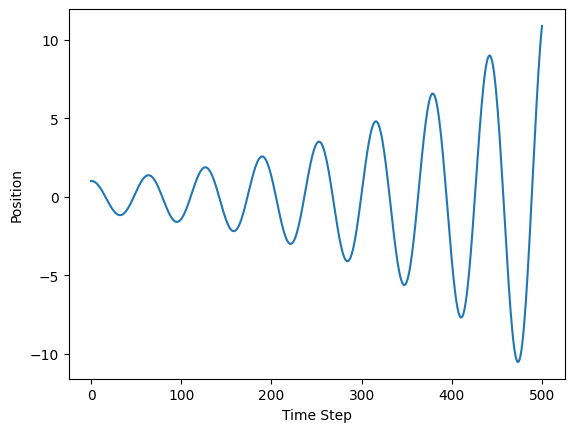

In [16]:
k=1.0
m=1.0
dt=0.1
num_steps=500
def potential(x):
  return 0.5*k*x**2
#force
force=jit(grad(potential))
#update step
@jit
def update(state):
  x,v=state
  a=-force(x)/m
  x_new=x+v*dt
  v_new=v+a*dt
  return x_new,v_new
#simulate
state=jnp.array([1.0,0.01])
trajectory=[state] #defining
for i in range(num_steps):
  state=update(state)
  trajectory.append(state)

trajectory =jnp.array(trajectory)
print(trajectory)
plt.plot(trajectory[:,0])
plt.xlabel("Time Step")
plt.ylabel("Position")
plt.show()

In [19]:
def kinetic_energy(state):
  x, v = state
  return 0.5 * m * v**2

def potential_energy(state):
  x, v = state
  return 0.5 * k * x**2

In [18]:
total_energy = []
for state in trajectory:
  ke = kinetic_energy(state)
  pe = potential_energy(state)
  total_e = ke + pe
  total_energy.append(total_e)

total_energy = jnp.array(total_energy)
print(total_energy)

[ 0.50005     0.50505054  0.5101011   0.51520205  0.5203541   0.5255576
  0.53081316  0.53612125  0.54148245  0.5468973   0.55236626  0.5578899
  0.5634688   0.5691034   0.57479453  0.58054245  0.5863478   0.5922113
  0.59813344  0.60411483  0.61015594  0.6162575   0.6224201   0.6286443
  0.63493073  0.64128006  0.64769286  0.6541697   0.6607114   0.6673185
  0.6739916   0.6807316   0.687539    0.6944143   0.70135844  0.708372
  0.71545583  0.72261035  0.72983646  0.7371348   0.7445061   0.7519512
  0.75947076  0.7670655   0.7747361   0.78248346  0.79030824  0.79821134
  0.8061934   0.8142554   0.82239795  0.83062196  0.8389281   0.84731734
  0.8557905   0.8643484   0.8729919   0.8817218   0.890539    0.8994444
  0.9084389   0.9175232   0.92669845  0.93596536  0.945325    0.9547784
  0.9643262   0.9739694   0.983709    0.9935461   1.0034816   1.0135163
  1.0236516   1.0338881   1.0442269   1.0546691   1.065216    1.0758682
  1.0866269   1.0974933   1.1084682   1.1195527   1.1307483   1

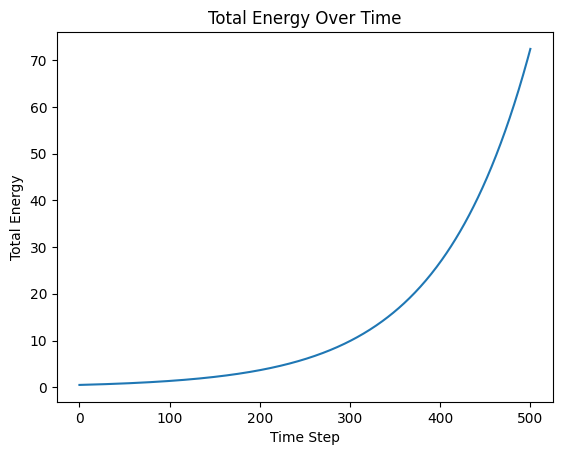

In [20]:
plt.plot(total_energy)
plt.xlabel("Time Step")
plt.ylabel("Total Energy")
plt.title("Total Energy Over Time")
plt.show()

## Summary:

### Data Analysis Key Findings

*   Functions for calculating kinetic and potential energy were successfully defined using the formulas \$0.5 \* m \* v\^2\$ and \$0.5 \* k \* x\^2\$, respectively.
*   The total energy at each time step was calculated by summing the kinetic and potential energy for each state in the trajectory.
*   The total energy over time was plotted, showing the variation of total energy throughout the trajectory.

### Insights or Next Steps

*   Analyzing the plot of total energy over time can provide insights into the conservation of energy in the system. If the total energy remains relatively constant, it indicates energy conservation.
*   Further analysis could involve calculating the mean or standard deviation of the total energy to quantify its stability or fluctuations.
